初始化的学习率： 0.1


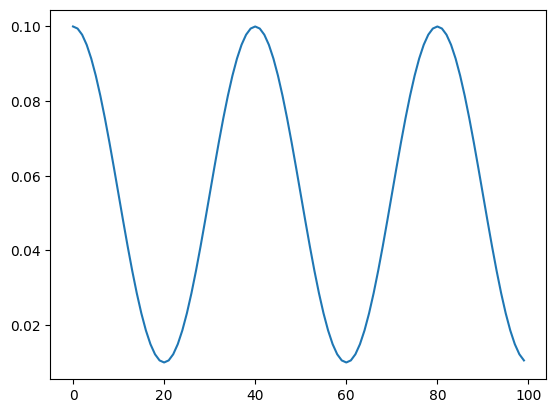

In [4]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
 
initial_lr = 0.1
 
net=nn.Sequential(
    nn.Linear(1,10)
)
 
optimizer = torch.optim.Adam(
    net.parameters(), 
    lr = initial_lr)
 
scheduler = CosineAnnealingLR(
    optimizer, 
    T_max=20,
    eta_min=0.01)
 
print("初始化的学习率：", optimizer.defaults['lr'])
 
lst=[]
for epoch in range(1, 101):
    # train
    optimizer.zero_grad()
    optimizer.step()
    lst.append(optimizer.param_groups[0]['lr'])
    #print("第%d个epoch的学习率：%.9f" % (epoch, optimizer.param_groups[0]['lr']))
    scheduler.step()
 
plt.plot(lst)

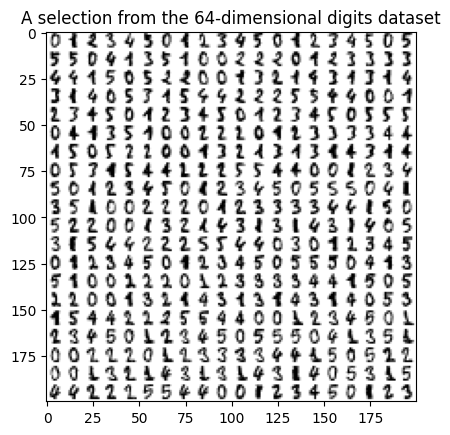

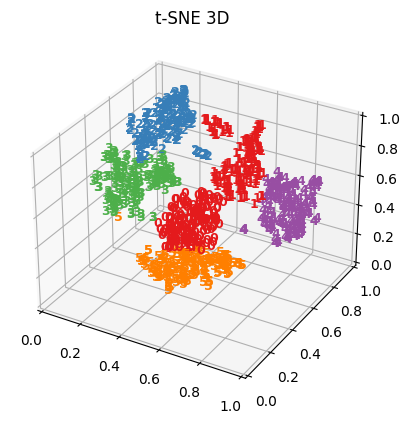

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets import load_digits

from sklearn.manifold import TSNE
digits = load_digits(n_class=6)
X = digits.data#1083*64
y = digits.target#1083 max(y)=5

n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

#按行放置 取前400个图片
#img中会有0、10、20列这些没有，是为了形成空列吧。
plt.imshow(img, cmap=plt.cm.binary)#cmap: 颜色图谱（colormap), 默认绘制为RGB(A)颜色空间。
plt.title('A selection from the 64-dimensional digits dataset')

import time#需导入包
tsne = TSNE(n_components=3, init='pca', random_state=0)
t0 = time
X_tsne = tsne.fit_transform(X)
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)
    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if title is not None:
        plt.title(title)

plot_embedding_3d(X_tsne,"t-SNE 3D " )
